# **Customer Churn Analysis**

Data Preprocessing and Exploratory Analysis

In [ ]:
# import modules
import pandas as pd # for dataframes
import seaborn as sns # for plotting graphs
import matplotlib.pyplot as plt # for plotting graphs
from datetime import datetime as dt
import missingno as msno          # calculate missing value          


In [ ]:
# URL for the data file and read it into the data frame
url = 'https://raw.githubusercontent.com/bhascarp/Data_Files/main/churn.csv'
churn_df = pd.read_csv(url)

In [ ]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


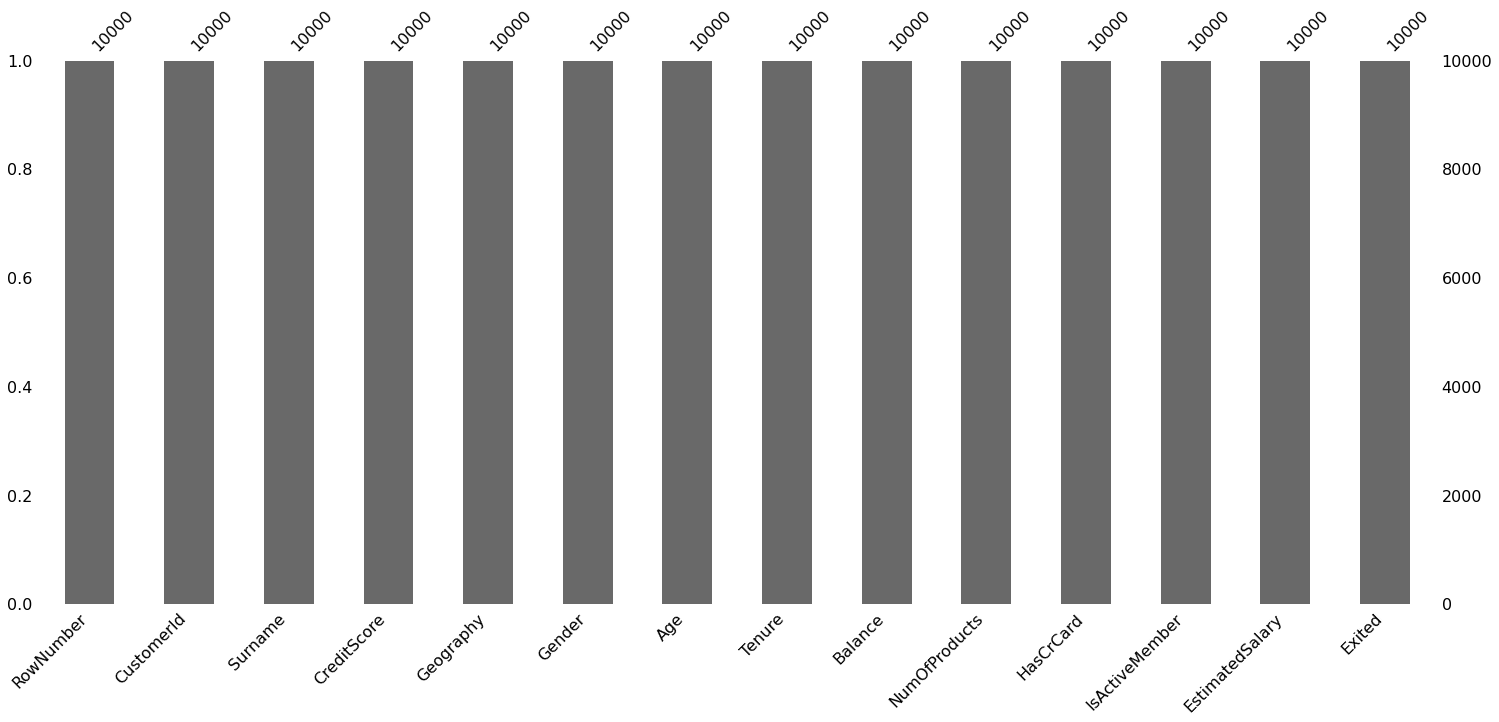

In [65]:
# Visualize missing values as a bar
msno.bar(churn_df)

In [95]:
# Checking unique values of customer
churn_df['CustomerId'].nunique()

10000

In [96]:
# Check the churn ratio from the data
churn_df.groupby(['Exited'])['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

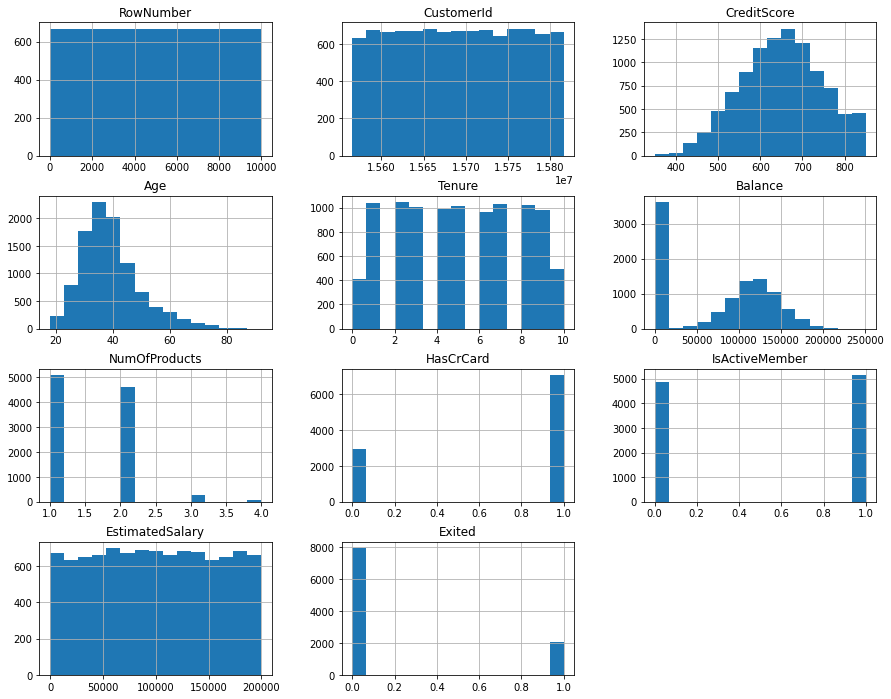

In [97]:
# check distribution of values of the features

churn_df.hist(figsize=(15,12),bins = 15)
plt.show()

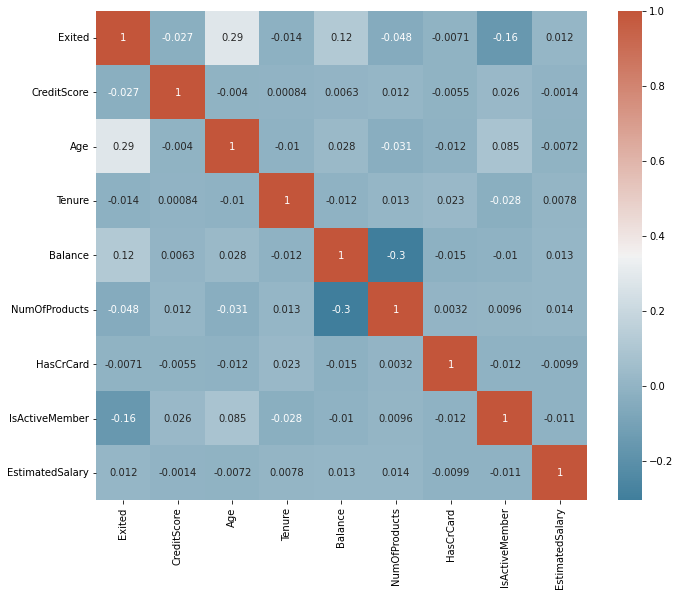

In [98]:
# Some insights into the relationship between features
# Observe the correlations

corr_data = churn_df[['Exited', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap
sns.heatmap(corr_data, cmap=cmap, annot=True)

From the above correlation matrix, we observe following:


*   There is positive correlation between:

    Age and Churn (Exited),
    Balance and Churn,
    Estimated Salary and Churn

*   There is negative correlation between:

    Credit Score and Churn,
    Tenure and Churn,
    NumOfProducts and Churn,
    HasCrCard,
    IsActiveMember

In [78]:
#Creating matrix of features
x=churn_df.iloc[:,3:13].values
y=churn_df.iloc[:,13].values

In [79]:
#Importing Encoding libraries
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [80]:
#Encode categorical variables
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')

X = np.array(ct.fit_transform(x))


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [87]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Applying some classification and ensemble models**

In [143]:
# Apply classifiers and decide to pick one to use in production based on the performance
# Hyperparameters of the given classifiers are chosen as trial-error 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

This is a classification task, and the most commonly used metric is accuracy. Hence, we will use accuracy while comparing the performance of different algorithms.

In [144]:
# Models Results
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        print("accuracy:", "{:.2f}".format(acc_score), "Model:", name)

accuracy: 0.82 Model: Nearest Neighbors
accuracy: 0.80 Model: Linear SVM
accuracy: 0.80 Model: RBF SVM
accuracy: 0.86 Model: Gaussian Process
accuracy: 0.86 Model: Decision Tree
accuracy: 0.85 Model: Random Forest
accuracy: 0.86 Model: AdaBoost
accuracy: 0.80 Model: Naive Bayes
accuracy: 0.79 Model: QDA


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy: 0.87 Model: XGBoost
accuracy: 0.86 Model: LightGBM


# Analyzing with a deep learning model, Artificial Neural Networks

# **Building ANN**

In [128]:
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
import tensorflow as tf


In [129]:
# Initialising the ANN
ann = tf.keras.models.Sequential()
#classifier = Sequential()

In [131]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
#NeuralClf.add(Dense(6,kernel_initializer='uniform',activation='relu',input_shape=(11,)))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
#classifier.add(Dense(units = 6, kernel_initializer="uniform", activation = 'relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
#classifier.add(Dense(units = 1, kernel_initializer="uniform", activation = 'sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
#ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.7879
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.8049
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8166
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8224
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8257
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3938 - accuracy: 0.8282
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8281
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8300
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.8309
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3715 - accura

In [141]:
#Predicting test test results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [142]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1523   72]
 [ 203  202]]


0.8625

Per the above confusion matrix:
 1523 customers were correctly predicted to stay with the organization,
 202 customers were correctly predicted to leave,
 72 customers were incorrectly predicted to leave and
 203 customers were incorrectly predicted to stay.

 The accuracy of the ANN model is 0.8625

*italicized text*